# Bank Churn Analysis

Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler, MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras
import missingno as msno

Import dataset

In [3]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Drop irrelevant columns

In [4]:
df.drop(df.columns[[0, 21, 22]], axis=1, inplace=True)

In [5]:
# Variables explained
# Attrition: if the account is closed then 1 else 0
# Customer_Age: Customer's Age in Years
# Gender: M=Male, F=Female
# Dependent_count: Number of dependents
# Education_Level: Educational Qualification of the account holder
# Marital_Status: Married, Single, Divorced, Unknown
# Income_Category: Annual Income Category of the account holder
# Card_Category: Type of Card (product)
# Months_on_book: Period of relationship with bank
# Total_Relationship_Count: Total no. of products held by the customer
# Months_Inactive_12_mon: No. of months inactive in the last 12 months
# Contacts_Count_12_mon: No. of Contacts in the last 12 months
# Credit_Limit: Credit Limit on the Credit Card
# Total_Revolving_Bal: Total Revolving Balance on the Credit Card
# Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
# Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
# Total_Trans_Amt: Total Transaction Amount (Last 12 months)
# Total_Trans_Ct: Total Transaction Count (Last 12 months)
# Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
# Avg_Utilization_Ratio: Average Card Utilization Ratio

# Univariate analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
# For each column check number of zero values (potential missing values)
for col in df.columns:
  print(col, df[col].eq(0).sum())

Attrition_Flag 0
Customer_Age 0
Gender 0
Dependent_count 904
Education_Level 0
Marital_Status 0
Income_Category 0
Card_Category 0
Months_on_book 0
Total_Relationship_Count 0
Months_Inactive_12_mon 29
Contacts_Count_12_mon 399
Credit_Limit 0
Total_Revolving_Bal 2470
Avg_Open_To_Buy 0
Total_Amt_Chng_Q4_Q1 5
Total_Trans_Amt 0
Total_Trans_Ct 0
Total_Ct_Chng_Q4_Q1 7
Avg_Utilization_Ratio 2470


Investigate zero values

In [9]:
# Show rows where column = 0 values
df[df['Total_Amt_Chng_Q4_Q1'] == 0]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3596,Attrited Customer,45,M,1,Graduate,Single,$60K - $80K,Blue,41,2,3,2,9904.0,2513,7391.0,0.0,1152,28,0.0,0.254
4417,Attrited Customer,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,6,3,3,8258.0,1771,6487.0,0.0,1447,23,0.0,0.214
4701,Attrited Customer,52,M,3,Uneducated,Single,$120K +,Blue,48,5,3,4,20974.0,0,20974.0,0.0,1246,27,0.0,0.000
7207,Attrited Customer,54,M,4,High School,Single,$80K - $120K,Silver,49,1,3,4,34516.0,214,34302.0,0.0,1201,22,0.0,0.006
7998,Attrited Customer,37,F,3,Post-Graduate,Married,$40K - $60K,Blue,36,2,2,5,3233.0,2517,716.0,0.0,1339,32,0.0,0.779


In [10]:
# Show rows where column = 0 values
df[df['Total_Ct_Chng_Q4_Q1'] == 0]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1905,Attrited Customer,37,M,2,Graduate,Married,$120K +,Blue,30,2,4,4,13662.0,0,13662.0,0.153,725,22,0.0,0.000
3596,Attrited Customer,45,M,1,Graduate,Single,$60K - $80K,Blue,41,2,3,2,9904.0,2513,7391.0,0.000,1152,28,0.0,0.254
4417,Attrited Customer,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,6,3,3,8258.0,1771,6487.0,0.000,1447,23,0.0,0.214
4701,Attrited Customer,52,M,3,Uneducated,Single,$120K +,Blue,48,5,3,4,20974.0,0,20974.0,0.000,1246,27,0.0,0.000
7165,Attrited Customer,47,F,3,Graduate,Married,Unknown,Blue,36,3,3,1,5590.0,0,5590.0,0.010,1507,32,0.0,0.000
7207,Attrited Customer,54,M,4,High School,Single,$80K - $120K,Silver,49,1,3,4,34516.0,214,34302.0,0.000,1201,22,0.0,0.006
7998,Attrited Customer,37,F,3,Post-Graduate,Married,$40K - $60K,Blue,36,2,2,5,3233.0,2517,716.0,0.000,1339,32,0.0,0.779


Total_Revolving_Bal and Avg_Utilization_Ratio are equal since the

Avg_Utilization_Ratio is:

*   (Total_Revolving_Bal / Avg_Open_To_Buy)
Where a lower score is generally better.

*   No zero values here should be interpreted as erroneous.

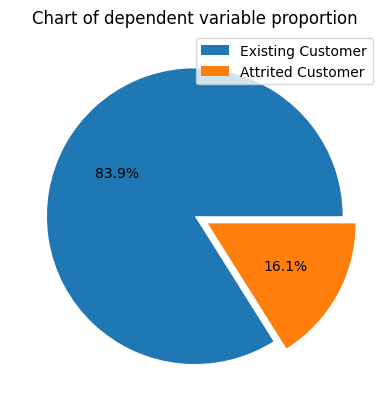

In [11]:
# Plot dependent variable proportions
vals = df['Attrition_Flag'].value_counts()

fig, ax = plt.subplots()
ax.pie(vals, labels=None, autopct='%1.1f%%', explode=(0, 0.1))
plt.title("Chart of dependent variable proportion")
plt.legend(labels=["Existing Customer", "Attrited Customer"], loc='upper right')

plt.show()

In [12]:
# Split variables into categorical and numeric for analysis
categorical = df[[
    'Attrition_Flag',
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category',
]]

numeric = df[[
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]]

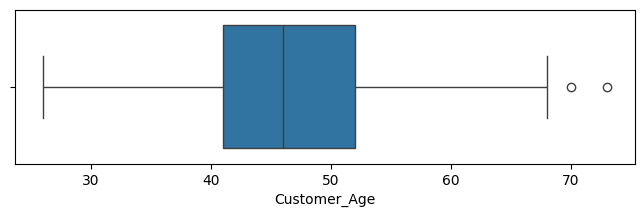

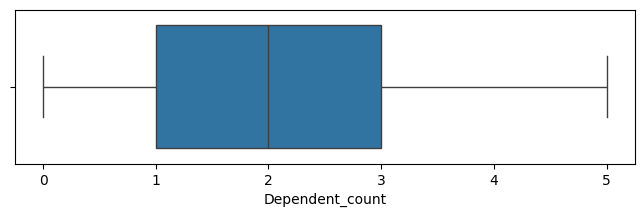

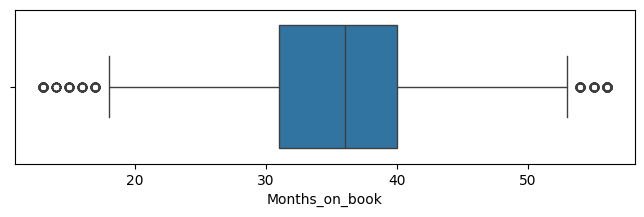

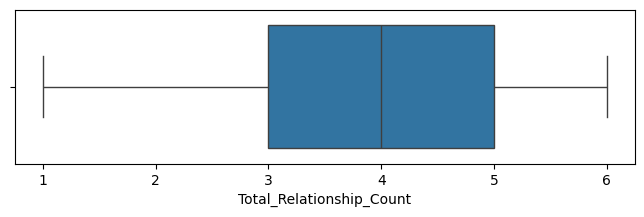

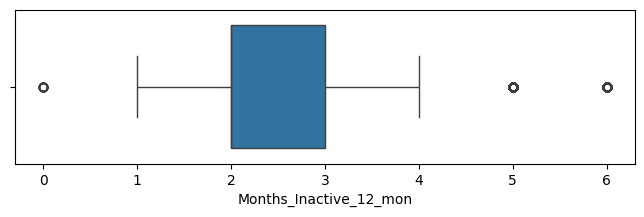

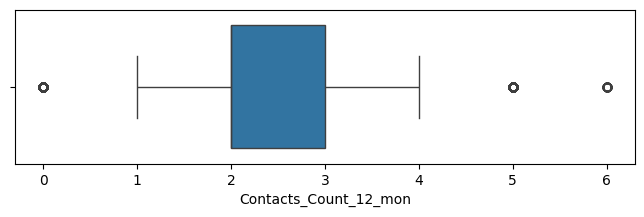

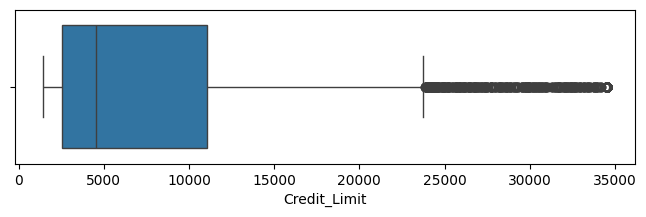

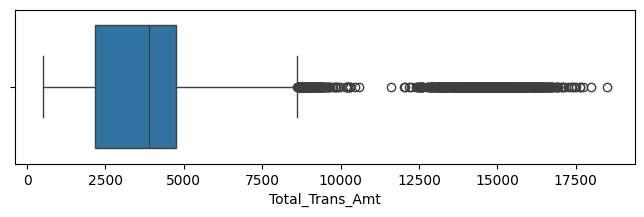

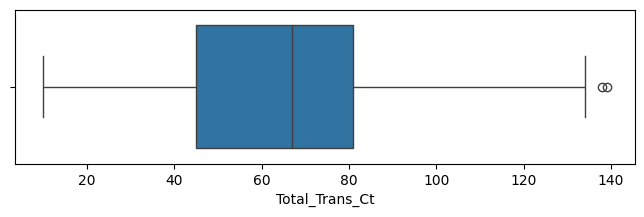

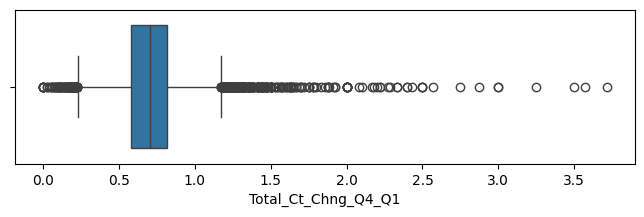

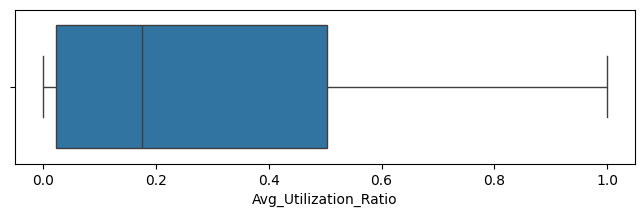

In [13]:
# Boxplots of numeric variables
cols = numeric.columns[:]

for col in cols:
    fig, ax = plt.subplots(1,1, figsize=(8,2))
    sns.boxplot(x=col, data=df)

plt.show()

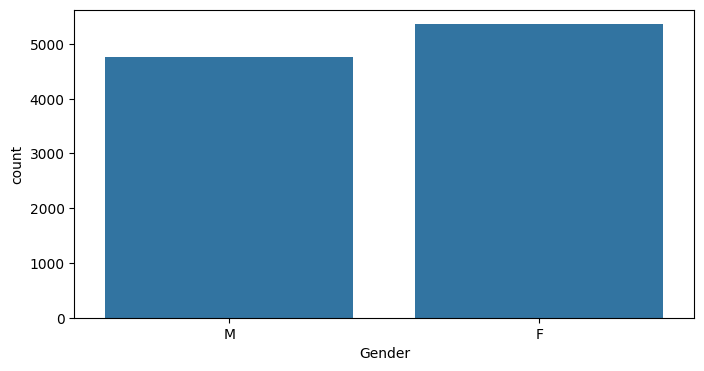

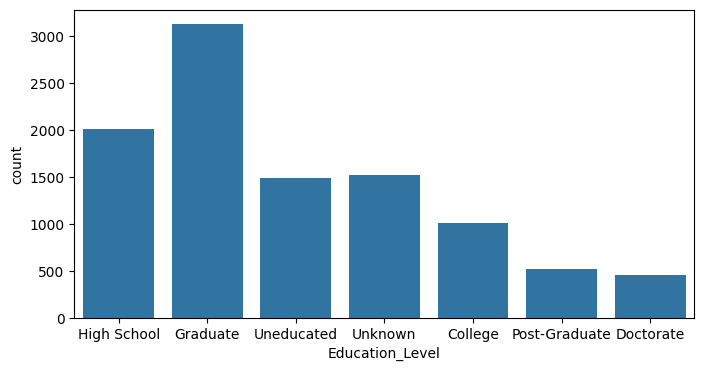

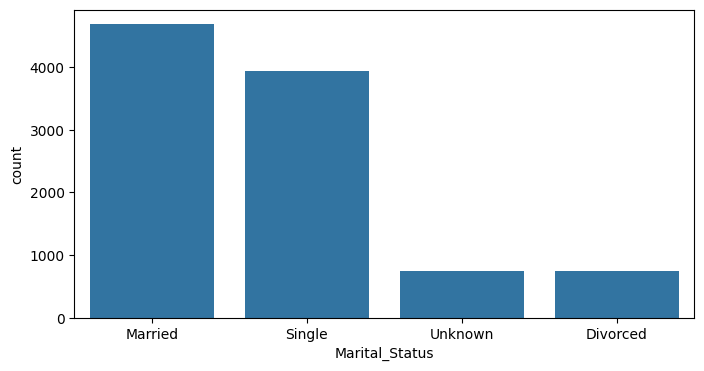

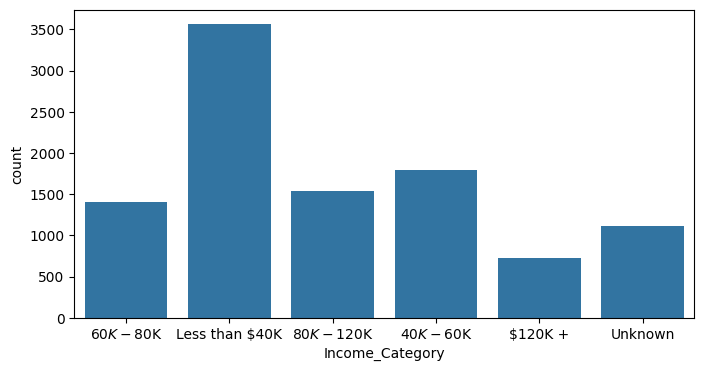

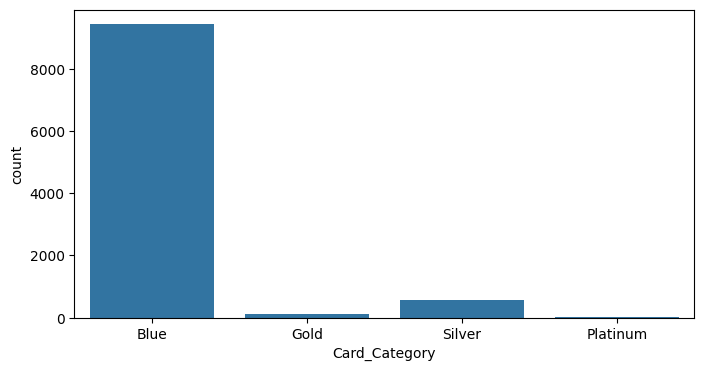

In [14]:
# Plot distribution of categorical variables
cols = categorical.columns[1:]

for col in cols:
  fig, ax = plt.subplots(figsize=(8,4))
  sns.countplot(data=categorical, x=col)

Some values are unknown in Education_Level, Marital_Status, Income_Category which will need dealing with.

In [15]:
# Show number of "Unknown" values
for col in categorical[["Education_Level", "Marital_Status", "Income_Category"]]:
  print(col, categorical[col].eq("Unknown").sum())

Education_Level 1519
Marital_Status 749
Income_Category 1112


# Multivariate analysis

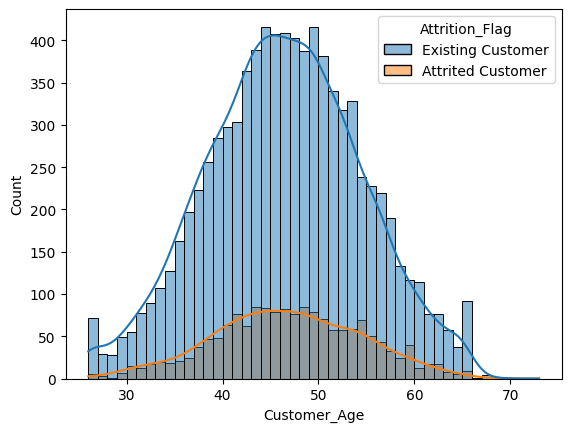

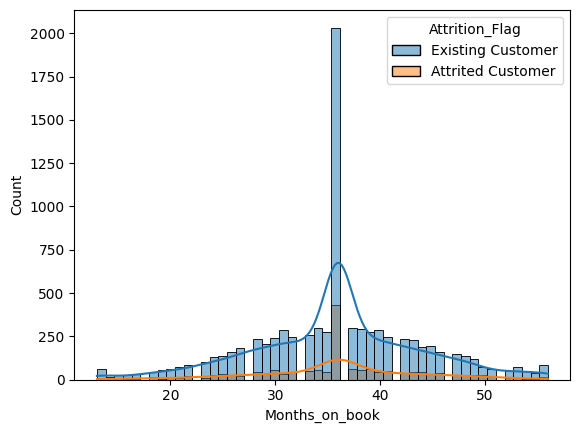

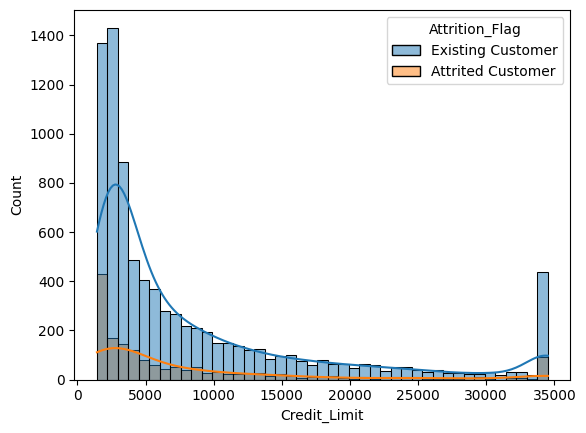

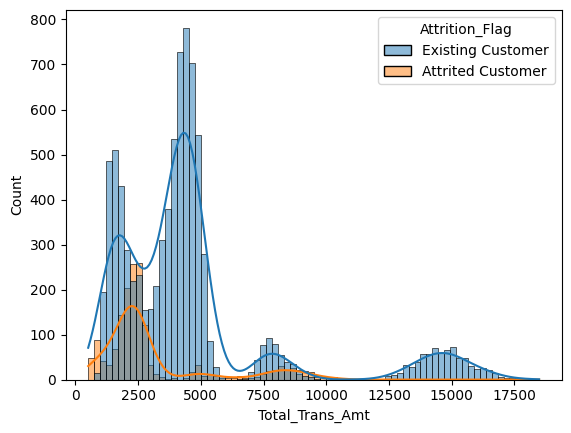

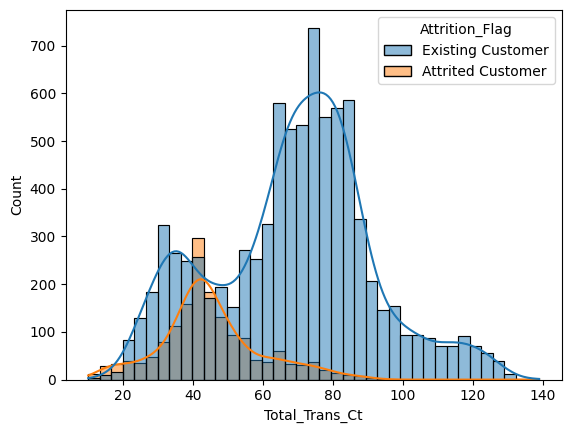

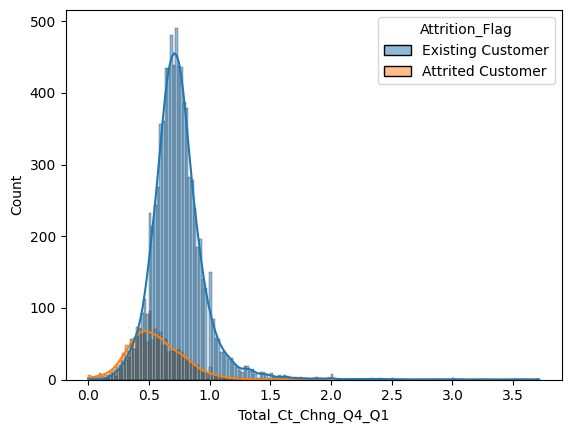

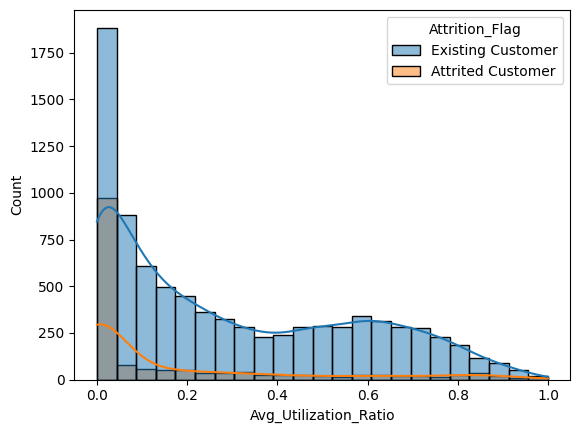

In [16]:
# Histogram of numeric columns with dependent variable
hist_plot_variables = numeric[["Customer_Age",
                               "Months_on_book",
                               "Credit_Limit",
                               "Total_Trans_Amt",
                               "Total_Trans_Ct",
                               "Total_Ct_Chng_Q4_Q1",
                               "Avg_Utilization_Ratio"]].columns

for col in hist_plot_variables:
    fig, ax = plt.subplots(1,1)
    sns.histplot(data=df, x=col, hue='Attrition_Flag', kde=True)

plt.show()

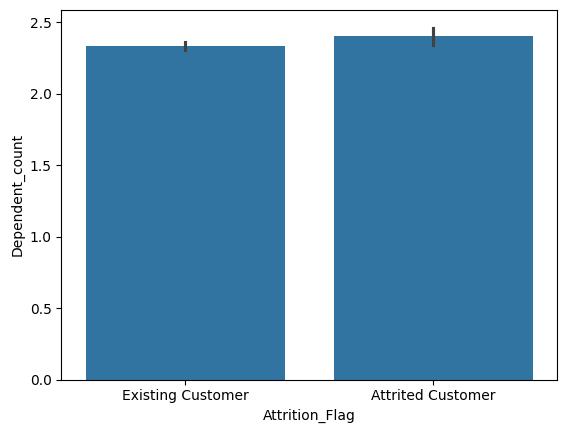

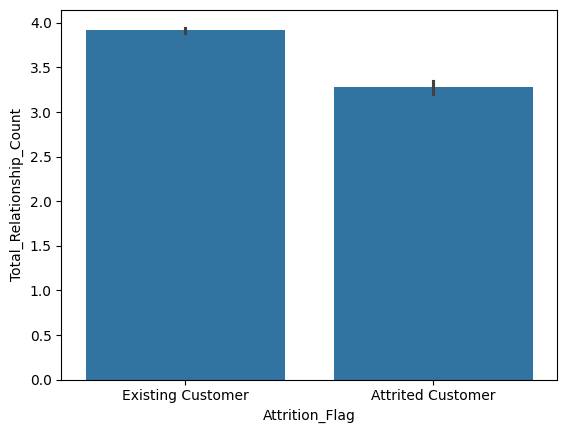

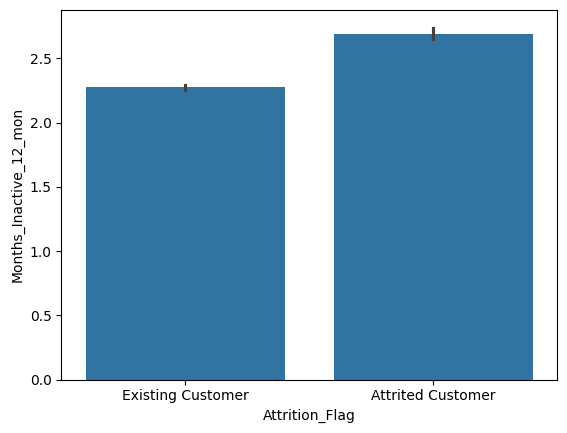

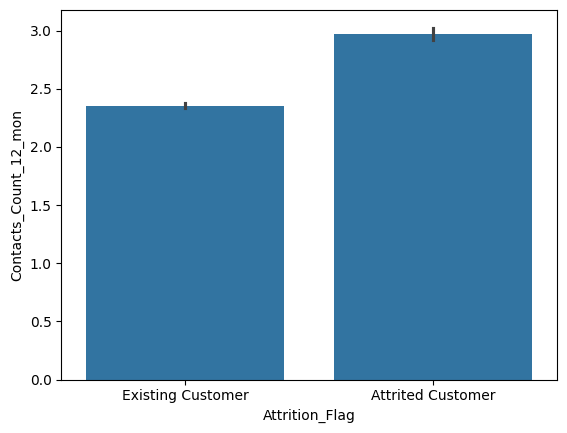

In [17]:
# Use seaborn barplot for other numeric variables not appropriate for histograms
bar_plt_variables = numeric[["Dependent_count",
                             "Total_Relationship_Count",
                             "Months_Inactive_12_mon",
                             "Contacts_Count_12_mon"]].columns

for col in bar_plt_variables:
    fig, ax = plt.subplots(1,1)
    sns.barplot(data=df, y=col, x="Attrition_Flag")

plt.show()

# Preprocessing

Check how missing values are distributed

In [18]:
# Check whether marital status as missing has an effect on dependent variable
df.query("Marital_Status=='Unknown'")["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    620
Attrited Customer    129
Name: count, dtype: int64

In [19]:
result = 620+129
print(f"Percent of target variable = 1 when Marital_Status = 'Unknown': {129/result*100}%")

Percent of target variable = 1 when Marital_Status = 'Unknown': 17.222963951935917%


Proportion of target variable is 17.2% for this subset vs 16.1% across all data. Distribution of "unknown" values seems random.

In [20]:
# Create copy of dataframe and change "Unknown" values to np.nan across df
df2 = df.copy()
df2 = df2.applymap(lambda x: np.nan if x == "Unknown" else x)

<Axes: >

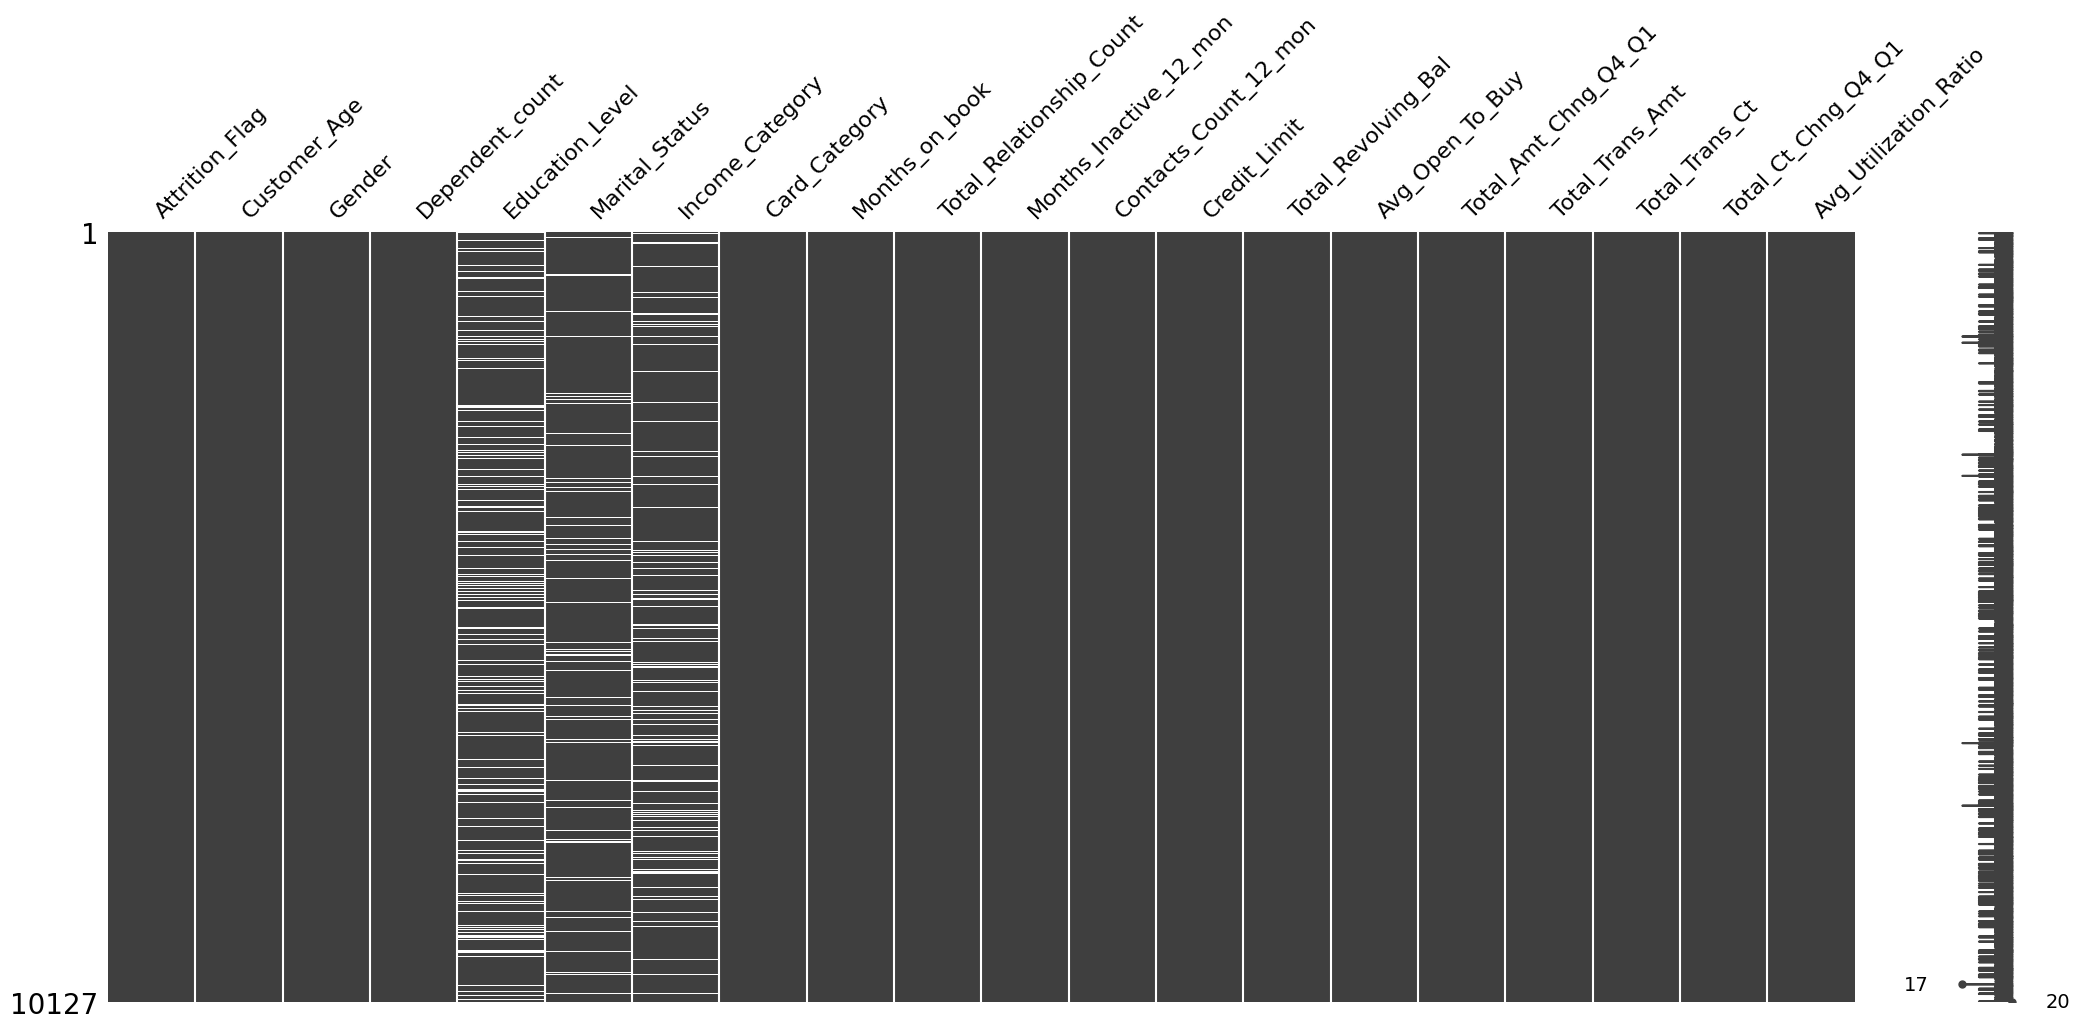

In [21]:
# Check how missing values are distributed
msno.matrix(df2)

<Axes: >

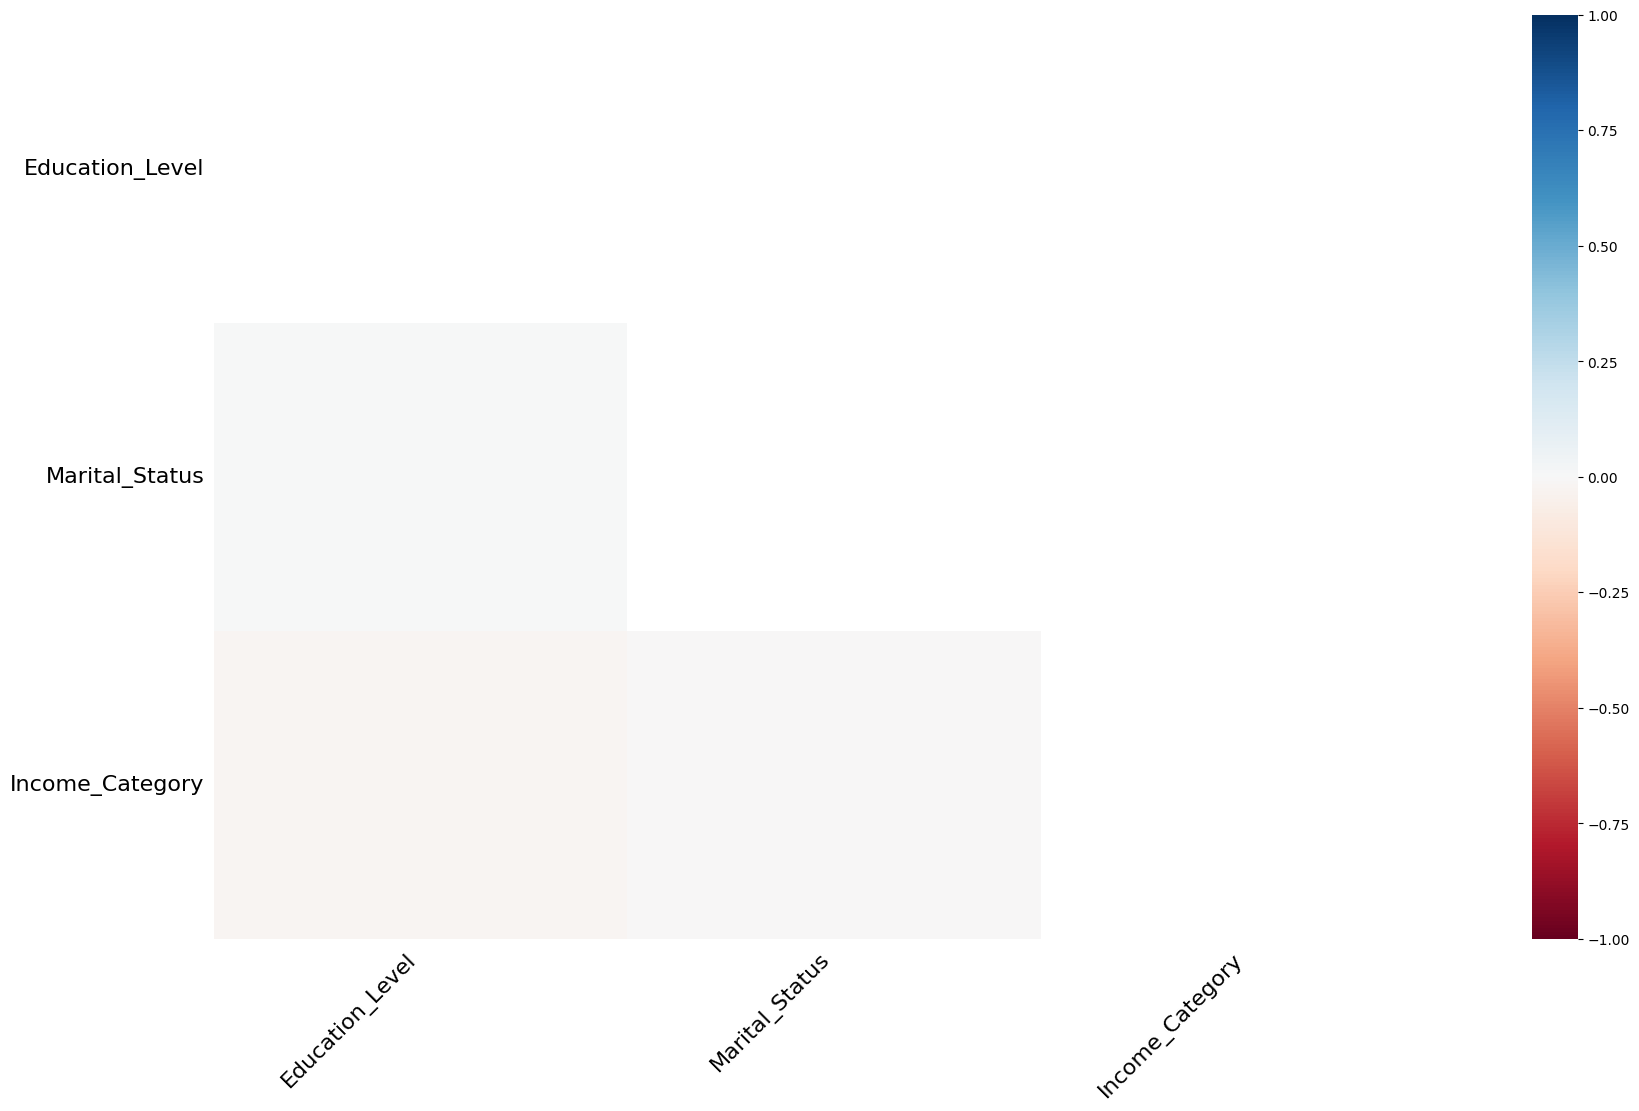

In [22]:
# Check whether missing values are correlated with one another
msno.heatmap(df2)

Since the missing values seem to be missing completely at random (MCAR), we can simply remove these rows from our analysis.

In [23]:
# Remove rows from dataset where Marital_Status has value "Unknown"
df = df.drop(df[df['Marital_Status'] == 'Unknown'].index)

In [24]:
# Show number of "Unknown" values for changed column
df["Marital_Status"].eq("Unknown").sum()

0

Encoding qualitative variables

In [27]:
# Encode ordinal variables and dependent variable
categories = [["Existing Customer", "Attrited Customer"],
              ["Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate"],
              ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"],
              ["Blue", "Silver", "Gold", "Platinum"]]



oe = OrdinalEncoder(categories=categories, handle_unknown="use_encoded_value", unknown_value=np.nan)
df[["Attrition_Flag", "Education_Level", "Income_Category", "Card_Category"]] = oe.fit_transform(df[["Attrition_Flag", "Education_Level", "Income_Category", "Card_Category"]])

In [28]:
# Show number of np.nan values
for col in df[["Education_Level", "Marital_Status", "Income_Category"]]:
  print(col, df[col].isna().sum())

Education_Level 1405
Marital_Status 0
Income_Category 1030


In [29]:
# Dummy encoding of nominal variables
df = pd.get_dummies(data=df, columns=["Gender", "Marital_Status"], dtype=float)

<Axes: >

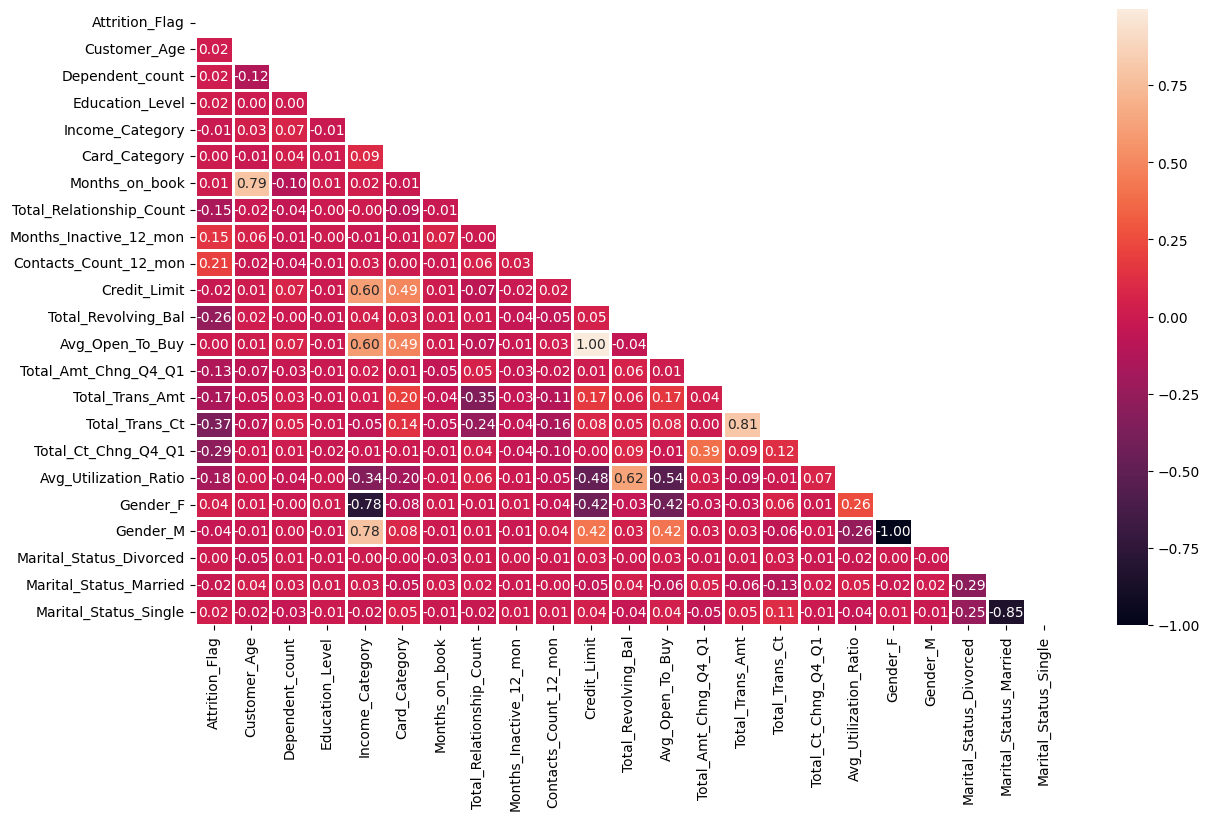

In [30]:
# Create correlation heatmap of features
corr = df.corr()
matrix = np.triu(corr)

plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=.8, mask=matrix)

Credit_Limit and Avg_Open_To_Buy are highly correlated

Feature engineering:
Engagement_score=(Contacts_Count_12_mon*weight)+(Months_Inactive_12_mon*weight)-(Total_Trans_Ct*weight)

In [31]:
# Normalise selected variables
scaler = MinMaxScaler()

df['normal_contact'] = scaler.fit_transform(df[['Contacts_Count_12_mon']])
df['normal_trans'] = scaler.fit_transform(df[['Total_Trans_Ct']])
df['normal_inactive'] = scaler.fit_transform(df[['Months_Inactive_12_mon']])

In [33]:
# Create new variables with weights
df["Engagement_score"] = (df["normal_contact"]*0.7) + (df["normal_inactive"]*0.4) - (df["normal_trans"]*1)

In [34]:
# Drop normalised variables
df.drop(columns=[
    "normal_contact",
    "normal_trans",
    "normal_inactive"], inplace=True)

<Axes: >

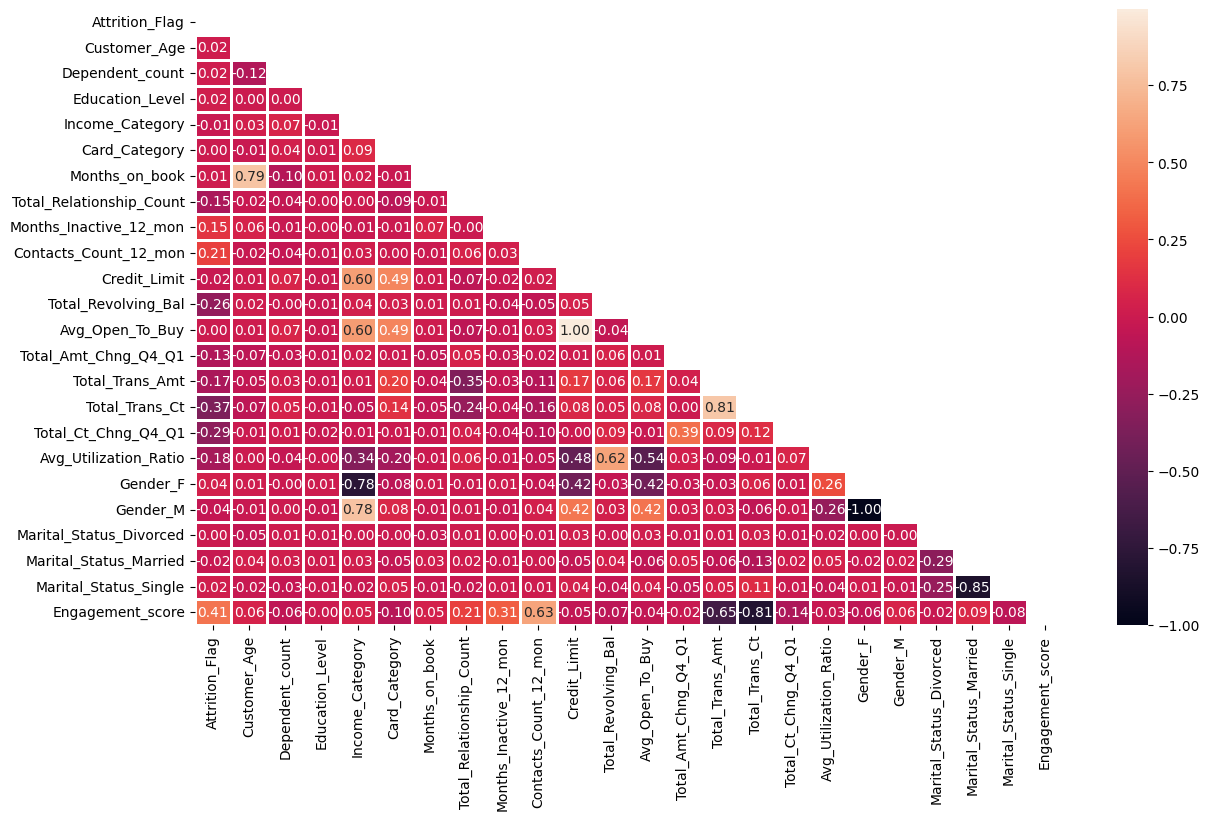

In [35]:
# Create correlation heatmap of features with new feature
corr = df.corr()
matrix = np.triu(corr)

plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=.8, mask=matrix)

In [36]:
# Credit_Limit and Avg_Open_To_Buy are multicollinear, remove Avg_Open_To_Buy variable.
df.drop(columns=["Avg_Open_To_Buy"], inplace=True)

# Create models

In [38]:
# Create X and y arrays
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

In [39]:
# Create initial models and measure accuracy
imputer = SimpleImputer(strategy="most_frequent")

models = [('KNN', KNeighborsClassifier()),
          ('RF', RandomForestClassifier(random_state=1)),
          ('LR', LogisticRegression()),
          ('DT', tree.DecisionTreeClassifier(random_state=1)),
          ('SVM', SVC())]

for name, model in models:
  pipeline = Pipeline([
      ('i', imputer),
      ('s', RobustScaler()),
      ('m', model)])

  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5)

  print(name, np.mean(scores))

KNN 0.8844121108742004
RF 0.9220482729211088
LR 0.8710862260127932
DT 0.8884662970859984
SVM 0.8985928073916133


In [40]:
# Create our models' parameter grids for tuning
tuned_models = {
    'KNN': (KNeighborsClassifier(), {
        'm__n_neighbors': np.arange(5, 11, 2),
        'm__weights': ['uniform', 'distance'],
        'm__metric': ['euclidean', 'manhattan', 'minkowski']
    }),
    'RF': (RandomForestClassifier(random_state=1), {
        'm__n_estimators': [175, 200],
        'm__max_features': ['sqrt', 'log2'],
        'm__criterion': ['gini', 'entropy']
    }),
    'LR': (LogisticRegression(), {
        'm__solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
        'm__C': [200, 175, 150]
    }),
    'DT': (tree.DecisionTreeClassifier(random_state=1), {
        'm__criterion': ['gini', 'entropy'],
        'm__max_depth': [10, 15, None],
        'm__min_samples_split': [4, 6, 8],
        'm__min_samples_leaf': [6,8,10]
    }),
    'SVM': (SVC(), {
        'm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'm__C': [10, 1.0]
    })
}

In [41]:
# Create lists and dictionary for results
results = []
best_params = []
f1_tune = []
confusion_matrices = {}

# Tune each model
for name, (model, param_grid) in tuned_models.items():
  pipeline = Pipeline([
      ('i', imputer),
      ('s', RobustScaler()),
      ('m', model)
    ])

  grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X, y)

  best_estimator = grid_search.best_estimator_
  y_pred_cv = cross_val_predict(best_estimator, X, y, cv=5)

# Create confusion matrix for each model
  cm = confusion_matrix(y, y_pred_cv)
  confusion_matrices[name] = cm

# Recall and precision metrics
  recall = recall_score(y, y_pred_cv)
  precision = precision_score(y, y_pred_cv)

# Create f1 metric
  f1score = 2*(precision*recall)/(precision+recall)
  f1_tune.append(f1score)

  best_params.append({"Name": name, "Best params": grid_search.best_params_})
  results.append({
      "Name": name,
      "Accuracy": grid_search.best_score_,
      "Recall": recall,
      "Precision": precision,
      "F1 Score": np.mean(f1_tune)})

In [42]:
results = pd.DataFrame(results)
results

,Name,Accuracy,Recall,Precision,F1 Score
0,KNN,0.896993,0.558077,0.733333,0.633813
1,RF,0.927059,0.660881,0.849057,0.688528
2,LR,0.870980,0.555407,0.604651,0.652014
3,DT,0.907549,0.644860,0.742506,0.661572
4,SVM,0.903817,0.597463,0.749581,0.662244


In [44]:
# Show best parameters for each model
best_params

[{'Name': 'KNN',
  'Best params': {'m__metric': 'manhattan',
   'm__n_neighbors': 9,
   'm__weights': 'distance'}},
 {'Name': 'RF',
  'Best params': {'m__criterion': 'entropy',
   'm__max_features': 'sqrt',
   'm__n_estimators': 175}},
 {'Name': 'LR', 'Best params': {'m__C': 200, 'm__solver': 'lbfgs'}},
 {'Name': 'DT',
  'Best params': {'m__criterion': 'gini',
   'm__max_depth': 10,
   'm__min_samples_leaf': 8,
   'm__min_samples_split': 4}},
 {'Name': 'SVM', 'Best params': {'m__C': 10, 'm__kernel': 'rbf'}}]

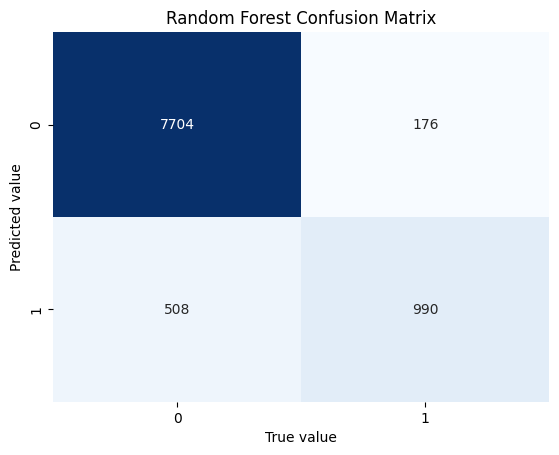

In [45]:
# Confusion matrix of best model (RF)

cm_rf = confusion_matrices["RF"]

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.show()

ANN Implementation

In [46]:
# Define cross-validation method
strat_kf_cv = StratifiedKFold(random_state=1, shuffle=True)

# Set random seed for keras models for reproducability
keras.utils.set_random_seed(1)

# Create empty lists for metrics
accuracies = []
recall = []
precision = []
f1 = []
true_pos = []
true_neg = []
false_pos = []
false_neg = []

# Create ANN model
model = Sequential([
    Dense(25, activation='relu', input_shape=(22,)),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
    'accuracy',
    'Recall',
    'Precision',
    'TrueNegatives',
    'FalsePositives',
    'TruePositives',
    'FalseNegatives'])


In [47]:
# Instantiate scaler and imputer
scaling = RobustScaler()
imputer = SimpleImputer(strategy="most_frequent")

In [48]:
# Fit data on model with 5 fold cross validation

for train_i, test_i in strat_kf_cv.split(X, y):
    # Split data into train and test sets
    X_train, X_test = X[train_i], X[test_i]
    y_train, y_test = y[train_i], y[test_i]

    # Impute missing values
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Scale the features
    X_train = scaling.fit_transform(X_train)
    X_test = scaling.transform(X_test)

    model.fit(X_train, y_train, epochs=125, batch_size=150, verbose=0)

    # Evaluate model and retrieve metrics
    _, accuracy, Recall, Precision, TrueNegatives, FalsePositives, TruePositives, FalseNegatives, = model.evaluate(X_test, y_test, verbose=0)

    accuracies.append(accuracy)
    recall.append(Recall)
    precision.append(Precision)

    # Create f1 metric
    f1score = 2*(Precision*Recall)/(Precision+Recall)
    f1.append(f1score)

    # Add predictions to list
    true_pos.append(TruePositives)
    true_neg.append(TrueNegatives)
    false_pos.append(FalsePositives)
    false_neg.append(FalseNegatives)

In [49]:

# Calculate mean values for metrics across 5 fold cv
mean_recall = np.mean(recall)
mean_acc = np.mean(accuracies)
mean_prec = np.mean(precision)
mean_f1 = np.mean(f1)

ann_scores = pd.DataFrame({"Name": "ANN", "Accuracy": [mean_acc], "Recall": [mean_recall], "Precision": [mean_prec], "F1 Score": [mean_f1]})
ann_scores

,Name,Accuracy,Recall,Precision,F1 Score
0,ANN,0.959374,0.864524,0.879264,0.871285


In [50]:
# Sum predictions
tp = sum(true_pos)
fp = sum(false_pos)
fn = sum(false_neg)
tn = sum(true_neg)

In [51]:
# Create final results dataframe
final_result = pd.concat([results, ann_scores])
final_result.set_index(final_result.columns[0], inplace=True)
final_result = final_result.round(2)

final_result

,Accuracy,Recall,Precision,F1 Score
Name,,,,
KNN,0.90,0.56,0.73,0.63
RF,0.93,0.66,0.85,0.69
LR,0.87,0.56,0.60,0.65
DT,0.91,0.64,0.74,0.66
SVM,0.90,0.60,0.75,0.66
ANN,0.96,0.86,0.88,0.87


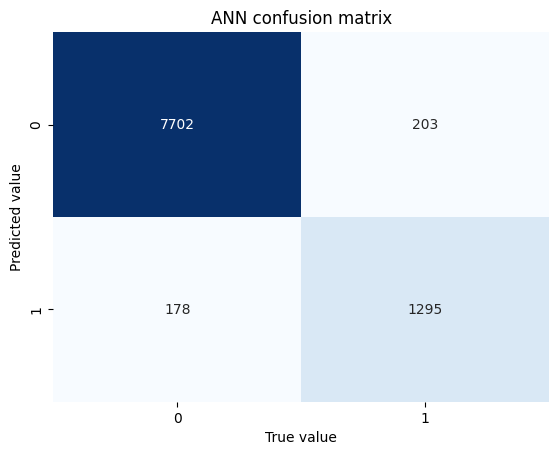

In [52]:
# Create confusion matrix for ANN model

ann_cm = np.array([[tn, fn],
              [fp, tp]])

sns.heatmap(ann_cm, annot=True, fmt='.0f', cmap='Blues', cbar=False)
plt.title("ANN confusion matrix")
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.show()